# Base Pipeline

This notebook acts as our main pipeline for our data audit report. 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats
sns.set()
%matplotlib inline

In [2]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    #df.drop(columns = 'Y', inplace = True)
    df = df.astype('int32')
    y = y.astype('int32')
    
    #replace 'PAY_0' with 'PAY_1' in order to allign with 'BILL_AMT1' and 'PAY_AMT1'
    df.rename(index=str, columns = {'PAY_0': 'PAY_1'}, inplace=True)

    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
y.head()

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int32

In [4]:
#change the 'EDUCATION' values
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other', 0: 'Other'})

#change the 'SEX' values
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

#change the 'MARRIAGE' values
df['MARRIAGE'] = df['MARRIAGE'].replace({2: 'Non-married', 1: 'Married', 3: 'Non-married', 0: 'Non-married'})

df = pd.get_dummies(df)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,0,0,0,1,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,1,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,1,0,0,0,1,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,1,0,0,0,1,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,0,1,0,0,1,1,0


Here, we show the distributions of the features we need to transform.

### BILL_AMT

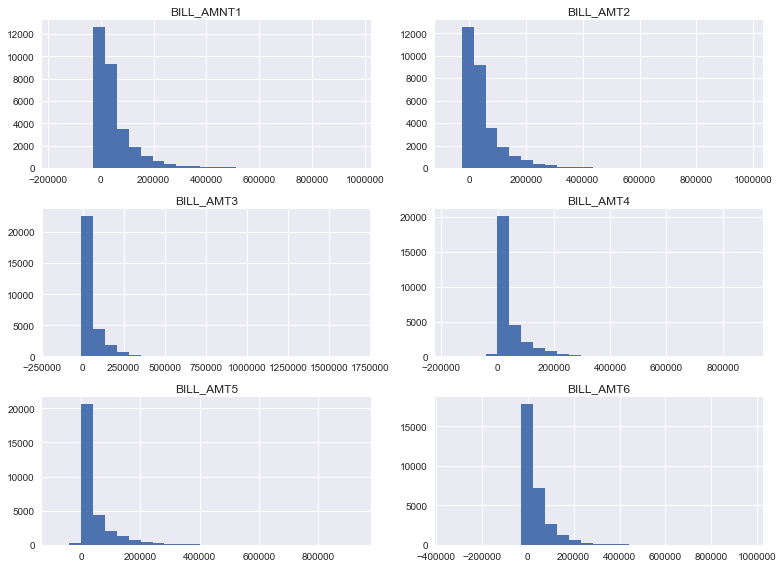

In [5]:
#create bill_amnts group
fig = plt.figure(figsize = (11,8))
bill_amts = df.loc[:, 'BILL_AMT1':'BILL_AMT6']


plt.subplot(3,2,1)
ax1 = bill_amts['BILL_AMT1'].hist(bins=25)
ax1.set_title('BILL_AMNT1')

plt.subplot(3,2,2)
ax2 = bill_amts['BILL_AMT2'].hist(bins=25)
ax2.set_title('BILL_AMT2')

plt.subplot(3,2,3)
ax3 = bill_amts['BILL_AMT3'].hist(bins=25)
ax3.set_title('BILL_AMT3')

plt.subplot(3,2,4)
ax4 = bill_amts['BILL_AMT4'].hist(bins=25)
ax4.set_title('BILL_AMT4')

plt.subplot(3,2,5)
ax5 = bill_amts['BILL_AMT5'].hist(bins=25)
ax5.set_title('BILL_AMT5')

plt.subplot(3,2,6)
ax6 = bill_amts['BILL_AMT6'].hist(bins=25)
ax6.set_title('BILL_AMT6')

plt.tight_layout()

### PAY_AMT

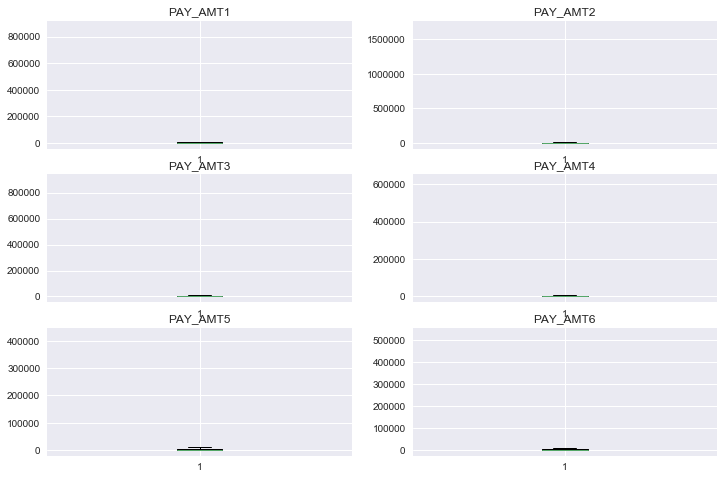

In [6]:
#create pay_amts group
pay_amts = df.loc[:, 'PAY_AMT1' : 'PAY_AMT6']

i = 1
plt.figure(figsize=(12,8))
for col in pay_amts:
    plt.subplot(3,2,i)
    plt.boxplot(pay_amts[col])
    plt.title(str(col))
    i +=1

### LIMIT_BAL

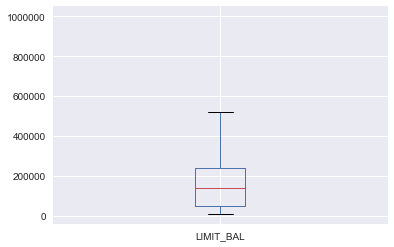

In [7]:
df['LIMIT_BAL'].plot(kind = 'box')

In [8]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married'],
      dtype='object')

## Column transformation strategies

We will use a simple Quantile Transformer method from sklearn to transform these distributions into a more Gaussian shape. 



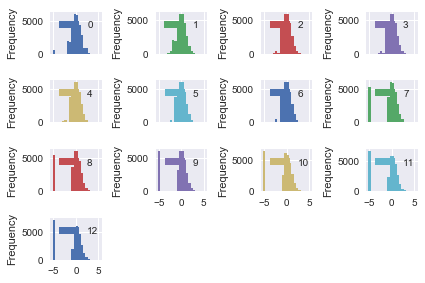

In [9]:
from sklearn.preprocessing import QuantileTransformer


transform_columns = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#create transformer object
quantile_transformer = QuantileTransformer(
        output_distribution='normal', random_state=2019)

#fit to the data
transform_columns_df = quantile_transformer.fit_transform(df[transform_columns])


#plot the results
pd.DataFrame(transform_columns_df).plot(kind = 'hist', subplots = True, bins = 20, layout = (4,4))
plt.tight_layout()


#bill_columns_transformer = Pipeline(steps = [])

In [10]:
#replace the old columns in df with the newly transformed columns

df.loc[:, ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = transform_columns_df

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,-1.649237,24,2,2,-1,-1,-2,-2,-0.648811,-0.666412,...,-5.199338,-5.199338,1,1,0,0,0,1,1,0
2,-0.130848,26,-1,2,0,0,0,2,-0.748892,-0.803280,...,-5.199338,0.177827,1,1,0,0,0,1,0,1
3,-0.329548,34,0,0,0,0,0,0,0.140851,-0.222909,...,-0.249721,0.826698,0,1,0,0,0,1,0,1
4,-0.842694,37,0,0,0,0,0,0,0.393435,0.450791,...,-0.161281,-0.221344,0,1,0,0,0,1,1,0
5,-0.842694,57,-1,0,-1,0,0,0,-0.407018,-0.515425,...,-0.434928,-0.403356,0,0,1,0,0,1,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler.fit(df))

df = scaler.transform(df)

df = pd.DataFrame(df)

df.columns =['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married']

df.head()



MinMaxScaler(copy=True, feature_range=(0, 1))


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
0,0.341399,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.437606,0.435914,...,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.487417,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.427982,0.422752,...,0.000000,0.517101,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.468309,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.513545,0.478564,...,0.475985,0.579500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.418961,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.537835,0.543351,...,0.484490,0.478714,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.418961,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.460859,0.450434,...,0.458175,0.461211,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Balance out the target

The target feature has an imbalance of its values; there are over 24,000 instances of class 0, but only roughly 6000 instances of class 1, so we are going to oversample our target in order to balance out the distribution of the two classes.

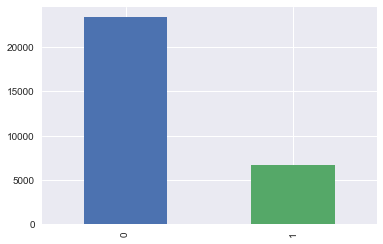

In [12]:
y.value_counts().plot(kind = 'bar')

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('Y', axis = 1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2019)

#begin oversampling
oversample = pd.concat([X_train,y_train],axis=1)
max_size = oversample['Y'].value_counts().max()
lst = [oversample]

for class_index, group in oversample.groupby('Y'):
        lst.append(group.sample(max_size-len(group), replace=True))
X_train = pd.concat(lst)
y_train=pd.DataFrame.copy(X_train['Y'])
del X_train['Y']

clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)

#conf_matrix = confusion_matrix(y_test, y_pred)

#print(f"accuracy of model: {accuracy}")

#print(f"confusion martix: \n {conf_matrix}")

#10-fold cross validation
kfold = KFold(n_splits=10, random_state=123)
scoring = 'accuracy'
results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
print('corss-validation mean accuracy score:', np.mean(results))
    

corss-validation mean accuracy score: 0.6735500024116998


In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)

#conf_matrix = confusion_matrix(y_test, y_pred)

#print(f"accuracy of model: {accuracy}")

#print(f"confusion martix: \n {conf_matrix}")
      
kfold = KFold(n_splits=10, random_state=123)
scoring = 'accuracy'
results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
print('corss-validation mean accuracy score:', np.mean(results))
    
        
   






corss-validation mean accuracy score: 0.6578281970690136
